# 混淆矩阵confusion_matrix

用于比较分类结果和实际预测值，并可以把分类结果的精度显示在一个混淆矩阵中。

混淆矩阵：

-|-|**Lable**|-|-
---|---|---|---|---
**-**|-|1（Positive）|0（Negative）
**Predict**|1（True）| True Positive|False Positive|P
**-**|0（False）| False Negative|True Negative|N

- TP，实际是正类并且被预测为正类
- FP，实际是负类并且被预测为正类
- TN，实际是负类并且被预测为负类
- FN，实际是正类并且被预测为负类

它们的组合会形成一个混淆矩阵。

由此引出True Positive Rate、False Positive两个概念：
- $TPR=\frac{TP}{TP+FN}$ , 表示在所有实际为正类的样本中，被正确地判断为正类的比率
- $FPR=\frac{FP}{FP+TN}$ , 表示在所有实际为负类的样本中，被错误地判断为正类的比率

Rate，最大好处是与样本数量无关。

根据ROC还可以计算如下指标：
- 精确率，$precision=\frac{TP}{TP+FP}$, 模型判断为正的所有样本中有多少位真正的正样本
- 召回率，$recall=\frac{TP}{P}$，真正的正样本被预测准确的比率
- 准确率，$accuracy=\frac{TP+TN}{P+N}$, 预测正负样本的准确比率
- 综合评价指标（F-Measure），precision和recall指标有时会出现矛盾，此时就需要对它们进行综合考虑，最常见的方式是F-Measure（F-Score），$F=\frac{(\alpha^2+1)P\times R}{\alpha^2(P+R)}$

F-Measure是precision和recall的加权调和平均数，当$\alpha=1$时，就是最常见的$F1$

# ROC

ROC（receiver operating characteristic）曲线是，横轴是`FPR`，纵轴是`TPR`.

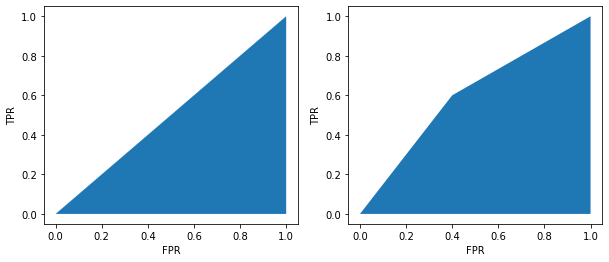

In [3]:
import matplotlib.pyplot as plt

f, axes = plt.subplots(1,2,figsize=(10,4))

x_data = [0,1]
y_data = [0,1]
axes[0].stackplot(x_data,y_data)
axes[0].set_xlabel("FPR")
axes[0].set_ylabel("TPR")


x_data = [0,0.4,1]
y_data = [0,0.6,1]
axes[1].stackplot(x_data,y_data)
axes[1].set_xlabel("FPR")
axes[1].set_ylabel("TPR")
plt.show()

当二者相等时，即y=x，如上图左所示，说明分类器对于正例和负例毫无区分能力，和抛硬币没什么区别，是最差的情况。

因此一般来说我们认为AUC的最小值为0.5（当然也存在预测相反这种极端的情况，AUC小于0.5，这种情况相当于分类器总是把对的说成错的，错的认为是对的，那么只要把预测类别取反，便得到了一个AUC大于0.5的分类器）。

而我们希望分类器达到的效果是：对于真实类别为1的样本，分类器预测为1的概率（即TPR），要大于真实类别为0而预测类别为1的概率（即FPR），即y＞x.

最理想的情况下，既没有真实类别为1而错分为0的样本——TPR一直为1，也没有真实类别为0而错分为1的样本——FPR一直为0，AUC为1，这便是AUC的极大值。

对于8个样本的预测情况如下：

-|-|-|-|-|-|-|-|-
---|---|---|---|---|---|---|---|---
**真实**|1|1|1|1|0|0|0|0|
**预测**|1|0|1|1|0|1|1|0|

得到混淆矩阵如下：

-|1(True)|0(False)
---|---|---
**1(Positive)**|3|2
**0(Negative)**|1|2

进而算得：

- $TPR=\frac{3}{4}$

- $FPR=\frac{2}{4}$

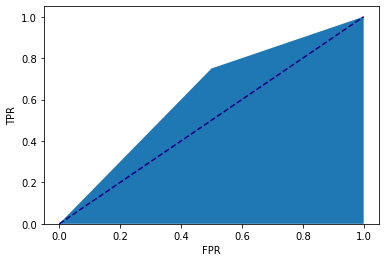

In [4]:
import matplotlib.pyplot as plt

x_data = [0,0.5,1]
y_data = [0,3/4,1]

plt.stackplot(x_data,y_data)
plt.plot([0, 1], [0, 1], color='navy',  linestyle='--')
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()